In [68]:
from xml.dom.minidom import parse
import xml.dom.minidom

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np

plt.style.use('seaborn-whitegrid')

# read data



In [36]:
def append2df(df, keys, vals):
    if len(keys) != len(vals):
        return
    df = df.append(dict(zip(keys, vals)),ignore_index=True)
    return df

def readData2df(dataPath):
    DOMTree = xml.dom.minidom.parse(dataPath)
    detectorRootNode = DOMTree.documentElement
    intervals = detectorRootNode.getElementsByTagName("tripinfo")

    downflow_df = pd.DataFrame(columns=['id','depart','duration','routeLength','stopTime','timeLoss'])
    rightflow_df = pd.DataFrame(columns=['id','depart','duration','routeLength','stopTime','timeLoss'])

    MaxStep = 10000
    detectFreq = 50

    for itor in intervals:
        if not itor.hasAttribute('id'): continue
        it_id = itor.getAttribute('id')
        it_depart = float(itor.getAttribute('depart'))
        it_duration = float(itor.getAttribute('duration'))
        it_routeLength = float(itor.getAttribute('routeLength'))
        it_stopTime = float(itor.getAttribute('stopTime'))
        it_timeLoss = float(itor.getAttribute('timeLoss'))
        keys = ['id', 'depart','duration','routeLength','stopTime','timeLoss']
        vals = [it_id, it_depart, it_duration, it_routeLength, it_stopTime, it_timeLoss]
        if it_id.split('.')[0] == 'downflow':
            downflow_df = append2df(downflow_df, keys, vals)
        elif it_id.split('.')[0] == 'rightflow':
            rightflow_df = append2df(rightflow_df, keys, vals)
    
    return downflow_df, rightflow_df


In [47]:
rootPath = '../SUMO_code/SUMO-V2X-Communication-Research-Platooning-and-CIM/'

filePath = 'output/tripinfo_platoon.xml'
dataPath = os.path.join(rootPath, filePath)
platoon_downflow_df, platoon_rightflow_df = readData2df(dataPath)

filePath = 'output/tripinfo_noPlatoon.xml'
dataPath = os.path.join(rootPath, filePath)
noplatoon_downflow_df, noplatoon_rightflow_df = readData2df(dataPath)


## calculate data

In [53]:
print('baseline platoon -------------------------')
print('down flow travel time mean:',str(platoon_downflow_df['duration'].mean()),'s std:',str(platoon_downflow_df['duration'].std()))
print('down flow finished:',str(platoon_downflow_df.shape[0]))
print('right flow travel time mean:',str(platoon_rightflow_df['duration'].mean()),'s std:',str(platoon_rightflow_df['duration'].std()))
print('right flow finished:',str(platoon_rightflow_df.shape[0]))

print('no platoon -------------------------')
print('down flow travel time mean:',str(noplatoon_downflow_df['duration'].mean()),'s std:',str(noplatoon_downflow_df['duration'].std()))
print('down flow finished:',str(noplatoon_downflow_df.shape[0]))
print('right flow travel time mean:',str(noplatoon_rightflow_df['duration'].mean()),'s std:',str(noplatoon_rightflow_df['duration'].std()))
print('right flow finished:',str(noplatoon_rightflow_df.shape[0]))



baseline platoon -------------------------
down flow travel time mean: 40.26687306501545 s std: 4.134131354379786
down flow finished: 323
right flow travel time mean: 49.1798742138365 s std: 3.5603615922574505
right flow finished: 159
no platoon -------------------------
down flow travel time mean: 181.3179310344828 s std: 51.183152432337344
down flow finished: 145
right flow travel time mean: 184.57499999999996 s std: 132.50319241437165
right flow finished: 96


# plot data


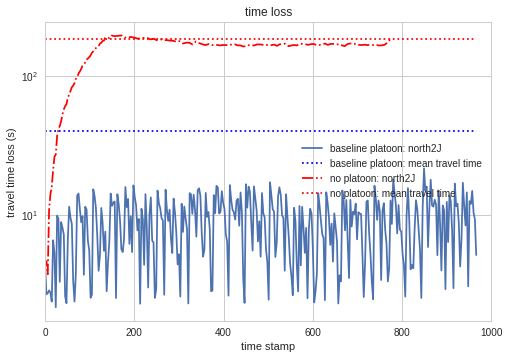

In [88]:
plt.figure(facecolor='white',edgecolor='black')
plt.semilogy(platoon_downflow_df['depart'],platoon_downflow_df['timeLoss'])
yy = np.ones((platoon_downflow_df.shape[0],1))*platoon_downflow_df['duration'].mean()
plt.semilogy(platoon_downflow_df['depart'],yy,'r',linestyle=':',color='b')

plt.semilogy(noplatoon_downflow_df['depart'],noplatoon_downflow_df['timeLoss'],'r',linestyle='-.')
yy = np.ones((platoon_downflow_df.shape[0],1))*noplatoon_downflow_df['duration'].mean()
plt.semilogy(platoon_downflow_df['depart'],yy,'r',linestyle=':')

plt.legend(['baseline platoon: north2J','baseline platoon: mean travel time', 'no platoon: north2J',
            'no platoon: mean travel time'],loc=7)
plt.ylabel('travel time loss (s)')
plt.xlabel('time stamp')
plt.xlim([-0.1,1000])
plt.title('time loss')
plt.show()